In [3]:
elms = ['r','g','b','rg','rb','gb','rgb']

In [7]:
rels = [['r','rg'],['r','rb'],['g','rg'],['g','gb'],['b','rb'],['b','gb'],['rb','rgb'],['rg','rgb'],['gb','rgb']]

We'll create the RGB statespace as a poset (I think this could have been automated without typing out the covering relations by hand, but whatever...)

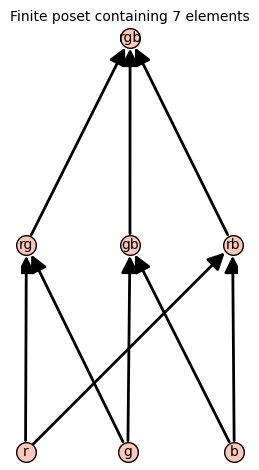

In [84]:
P = Poset([elms,rels])
P

Now we can use Sage's built in methods for posets to probe this poset in various ways.  For example, we can list its antichains:

In [85]:
antichains = P.antichains()
antichains

Set of antichains of Finite poset containing 7 elements

In [86]:
list(antichains)

[[],
 ['r'],
 ['r', 'g'],
 ['r', 'g', 'b'],
 ['r', 'b'],
 ['r', 'gb'],
 ['g'],
 ['g', 'b'],
 ['g', 'rb'],
 ['rg'],
 ['rg', 'b'],
 ['rg', 'gb'],
 ['rg', 'gb', 'rb'],
 ['rg', 'rb'],
 ['b'],
 ['gb'],
 ['gb', 'rb'],
 ['rb'],
 ['rgb']]

We can also get the list of all P's upsets (aka order filters)

In [87]:
upsets = P.directed_subsets('up')

upsets

Image of Set of antichains of Finite poset containing 7 elements by <function FinitePosets.ParentMethods.directed_subsets.<locals>.<lambda> at 0x1352a4040>

In [88]:
upfrozensets = [frozenset(u) for u in upsets]
upfrozensets

[frozenset(),
 frozenset({'r', 'rb', 'rg', 'rgb'}),
 frozenset({'g', 'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'g', 'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'g', 'gb', 'rg', 'rgb'}),
 frozenset({'b', 'g', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'g', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'rg', 'rgb'}),
 frozenset({'b', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'gb', 'rg', 'rgb'}),
 frozenset({'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'rb', 'rg', 'rgb'}),
 frozenset({'b', 'gb', 'rb', 'rgb'}),
 frozenset({'gb', 'rgb'}),
 frozenset({'gb', 'rb', 'rgb'}),
 frozenset({'rb', 'rgb'}),
 frozenset({'rgb'})]

Let's use this to make the lattice of upsets partially ordered by ⊆:

In [89]:
inclusions = [[X,Y] for X in upfrozensets for Y in upfrozensets if set(X).issubset(set(Y))]

inclusions

[[frozenset(), frozenset()],
 [frozenset(), frozenset({'r', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'g', 'gb', 'r', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'b', 'g', 'gb', 'r', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'b', 'gb', 'r', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'gb', 'r', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'g', 'gb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'b', 'g', 'gb', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'g', 'gb', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'rg', 'rgb'})],
 [frozenset(), frozenset({'b', 'gb', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'gb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'gb', 'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'rb', 'rg', 'rgb'})],
 [frozenset(), frozenset({'b', 'gb', 'rb', 'rgb'})],
 [frozenset(), frozenset({'gb', 'rgb'})],
 [frozenset(), frozenset({'gb', 'rb', 'rgb'})],
 [frozenset(), frozenset({'rb', 'rgb'})],
 [frozenset(), frozenset({'rgb'})],
 [frozenset({'

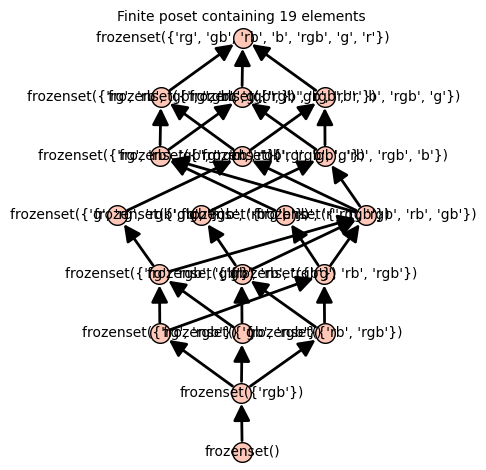

In [90]:
U = Poset([uptuples,inclusions])

U

Nice (though it looks a bit horrible)!

Now let's get all the nonempty regular sets of P - a noempty regular set is the intersection of an upset X with the set of all states ≤ some member of X:

In [46]:
regsets = set([frozenset(set(X).intersection(P.order_ideal([y]))) for X in upsets for y in X])
regsets

{frozenset({'rb'}),
 frozenset({'gb', 'rg', 'rgb'}),
 frozenset({'r', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'rb'}),
 frozenset({'r', 'rg'}),
 frozenset({'b'}),
 frozenset({'gb'}),
 frozenset({'b', 'gb'}),
 frozenset({'b', 'g', 'gb'}),
 frozenset({'gb', 'rgb'}),
 frozenset({'b', 'gb', 'rb', 'rgb'}),
 frozenset({'r', 'rb'}),
 frozenset({'rg'}),
 frozenset({'g', 'rg'}),
 frozenset({'rgb'}),
 frozenset({'rb', 'rg', 'rgb'}),
 frozenset({'gb', 'rb', 'rgb'}),
 frozenset({'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'g', 'gb'}),
 frozenset({'rg', 'rgb'}),
 frozenset({'g', 'gb', 'rg', 'rgb'}),
 frozenset({'rb', 'rgb'}),
 frozenset({'g', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'r'}),
 frozenset({'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'g', 'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'g', 'gb', 'rb', 'rg', 'rgb'}),
 frozenset({'b', 'r', 'rb'}),
 frozenset({'b', 'gb', 'r', 'rb', 'rg', 'rgb'}),
 frozenset({'g'}),
 frozenset({'g', 'r', 'rg'}),
 frozenset

We'll display the poset (not a lattice!) of nonempty regular sets ordered by ⊆ (aka $≤_\vee$):

In [47]:
reginclusions = [[X,Y] for X in regsets for Y in regsets if X.issubset(Y)]

In [49]:
R = Poset([regsets,reginclusions])
R

Finite poset containing 33 elements (use the .plot() method to plot)

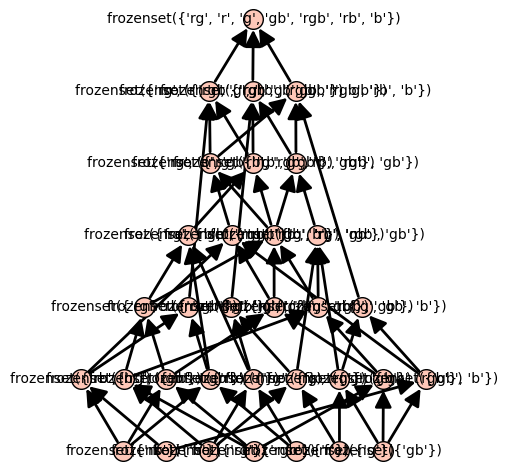

In [53]:
R.plot()

The label text makes that plot really hard to read.  It's a bit better if we get rid of it:

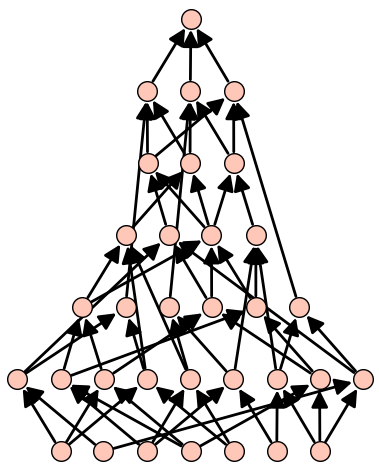

In [54]:
R.show(label_elements=False)

But it would be nicer still if we could generate label text for the nodes on our graph that conveys the essential information but is short enough to parse.  To do this, we'll represent a regular set in the same way that I did in truthmakers_fancy.py, as a comma-separated list of its minimal states, followed by a semicolon, followed by its maximal state.  First we'll need to write functions that get the minimal elements and maximal element of a regular set (oddly, sage doesn't seem to have any built in methods for this):

In [55]:
def minelements(poset,X):
    return X - set([x for x in X for y in X if poset.is_less_than(y,x)])

In [60]:
def join(poset,X):
    Xlist = list(X)
    x = Xlist[0]
    for y in Xlist:
        if poset.is_less_than(x,y):
            x = y
    return x

In [71]:
[[X,minelements(P,X),join(P,X)] for X in regsets]

[[frozenset({'rb'}), frozenset({'rb'}), 'rb'],
 [frozenset({'gb', 'rg', 'rgb'}), frozenset({'gb', 'rg'}), 'rgb'],
 [frozenset({'r', 'rb', 'rg', 'rgb'}), frozenset({'r'}), 'rgb'],
 [frozenset({'b', 'rb'}), frozenset({'b'}), 'rb'],
 [frozenset({'r', 'rg'}), frozenset({'r'}), 'rg'],
 [frozenset({'b', 'g', 'gb'}), frozenset({'b', 'g'}), 'gb'],
 [frozenset({'b', 'gb'}), frozenset({'b'}), 'gb'],
 [frozenset({'b', 'gb', 'rb', 'rgb'}), frozenset({'b'}), 'rgb'],
 [frozenset({'gb', 'rgb'}), frozenset({'gb'}), 'rgb'],
 [frozenset({'r', 'rb'}), frozenset({'r'}), 'rb'],
 [frozenset({'g', 'rg'}), frozenset({'g'}), 'rg'],
 [frozenset({'rb', 'rg', 'rgb'}), frozenset({'rb', 'rg'}), 'rgb'],
 [frozenset({'gb', 'rb', 'rg', 'rgb'}), frozenset({'gb', 'rb', 'rg'}), 'rgb'],
 [frozenset({'gb', 'rb', 'rgb'}), frozenset({'gb', 'rb'}), 'rgb'],
 [frozenset({'g', 'gb', 'r', 'rb', 'rg', 'rgb'}),
  frozenset({'g', 'r'}),
  'rgb'],
 [frozenset({'g', 'gb'}), frozenset({'g'}), 'gb'],
 [frozenset({'g', 'gb', 'rg', 'rgb'}

Yes, that's what we want.  Now we can use those functions to generate the short labels we need:

In [91]:
def label(poset,X):
    return ",".join(minelements(poset,X))+";"+join(poset,X)

[label(P,X) for X in regsets]

['rb;rb',
 'rg,gb;rgb',
 'r;rgb',
 'b;rb',
 'r;rg',
 'g,b;gb',
 'b;gb',
 'b;rgb',
 'gb;rgb',
 'r;rb',
 'g;rg',
 'rg,rb;rgb',
 'rg,rb,gb;rgb',
 'gb,rb;rgb',
 'g,r;rgb',
 'g;gb',
 'g;rgb',
 'b;b',
 'rg;rg',
 'g,b;rgb',
 'rgb;rgb',
 'g,rb;rgb',
 'g,r,b;rgb',
 'rg;rgb',
 'r;r',
 'r,b;rb',
 'rb;rgb',
 'rg,b;rgb',
 'r,b;rgb',
 'g;g',
 'gb;gb',
 'g,r;rg',
 'gb,r;rgb']

To use these we need to put them in a dictionary:

In [92]:
labeldict = {X:label(P,X) for X in regsets}

labeldict

{frozenset({'rb'}): 'rb;rb',
 frozenset({'gb', 'rg', 'rgb'}): 'rg,gb;rgb',
 frozenset({'r', 'rb', 'rg', 'rgb'}): 'r;rgb',
 frozenset({'b', 'rb'}): 'b;rb',
 frozenset({'r', 'rg'}): 'r;rg',
 frozenset({'b', 'g', 'gb'}): 'g,b;gb',
 frozenset({'b', 'gb'}): 'b;gb',
 frozenset({'b', 'gb', 'rb', 'rgb'}): 'b;rgb',
 frozenset({'gb', 'rgb'}): 'gb;rgb',
 frozenset({'r', 'rb'}): 'r;rb',
 frozenset({'g', 'rg'}): 'g;rg',
 frozenset({'rb', 'rg', 'rgb'}): 'rg,rb;rgb',
 frozenset({'gb', 'rb', 'rg', 'rgb'}): 'rg,rb,gb;rgb',
 frozenset({'gb', 'rb', 'rgb'}): 'gb,rb;rgb',
 frozenset({'g', 'gb', 'r', 'rb', 'rg', 'rgb'}): 'g,r;rgb',
 frozenset({'g', 'gb'}): 'g;gb',
 frozenset({'g', 'gb', 'rg', 'rgb'}): 'g;rgb',
 frozenset({'b'}): 'b;b',
 frozenset({'rg'}): 'rg;rg',
 frozenset({'b', 'g', 'gb', 'rb', 'rg', 'rgb'}): 'g,b;rgb',
 frozenset({'rgb'}): 'rgb;rgb',
 frozenset({'g', 'gb', 'rb', 'rg', 'rgb'}): 'g,rb;rgb',
 frozenset({'b', 'g', 'gb', 'r', 'rb', 'rg', 'rgb'}): 'g,r,b;rgb',
 frozenset({'rg', 'rgb'}): 'rg;r

We can use these short labels to generate a legible version of the above plot:

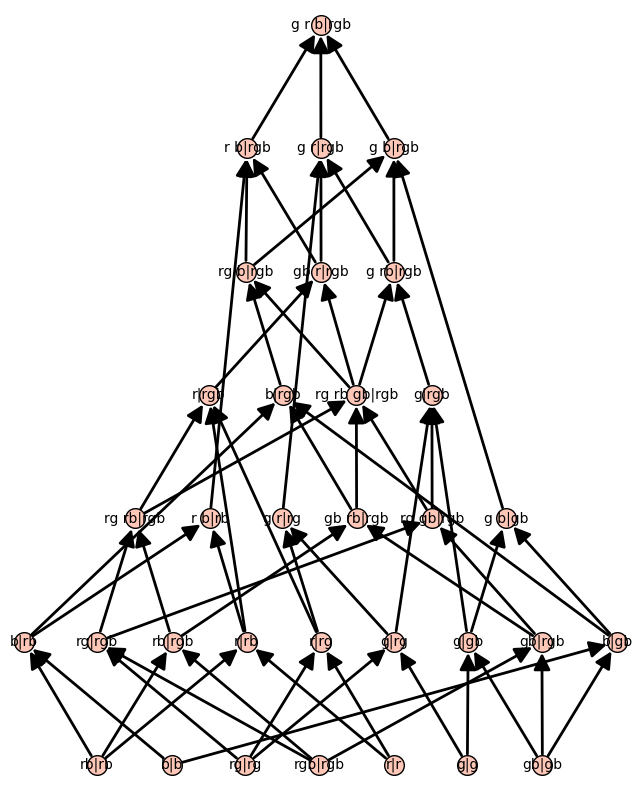

In [73]:
R.show(element_labels=labeldict,figsize=[8,8])

Next, we can create another poset with the same elements but ordered by conjunctive part ($≤_\wedge$) instead:

In [77]:
def conjpart(poset,X,Y):
    return Y.issubset(poset.order_filter(X)) and X.issubset(poset.order_ideal(Y))

In [78]:
regconjparts = [[X,Y] for X in regsets for Y in regsets if conjpart(P,X,Y)]

In [79]:
C = Poset([regsets,regconjparts])

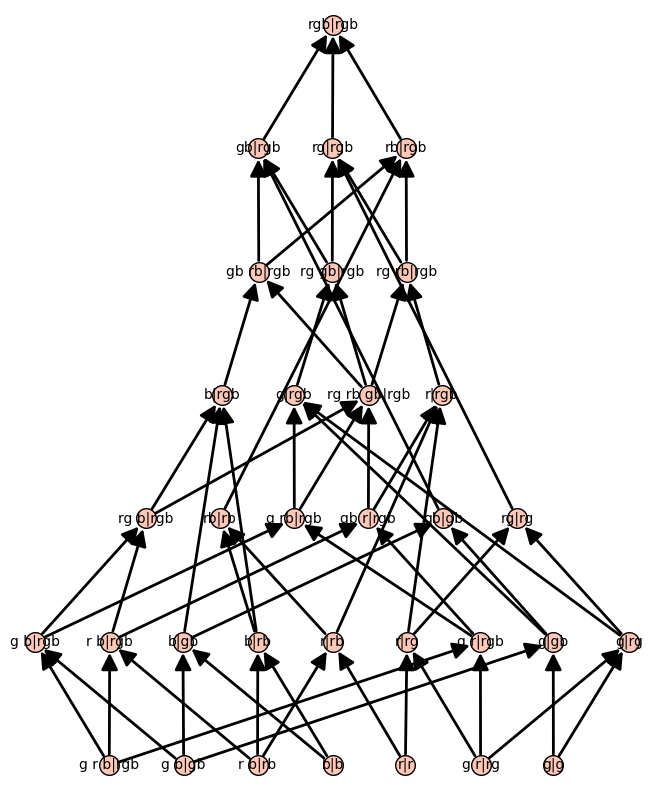

In [80]:
C.show(element_labels=labeldict,figsize=[8,8])

That's pretty nice!  Now what would be cool would be to draw those two plots side by side, with a line connecting every element on the left to the corresponding element on the right.  But to do this, we'll need to dip further into the innards - I think we can use the .hasse_diagram() method to extract NetworkX Digraphs from the two posets, merge them into a single Digraph, then add new undirected edges connecting the corresponding nodes.  